# NumPy Tutorial

https://www.w3schools.com/python/numpy/

## Multinomial Distribution

Multinomial distributions are a family of distributions that describe events that can have one of a fixed-number of states. For example, a die face can be anything in the set from 1 to 6, inclusive.

These are **discrete distributions**. These are extensions of binomial distributions for cases where more than only two states can result.

Use `random.multinomial()` to get a multinomial distribution. Specify these three parameters:
- `n` = number of possible outcomes
- `pvals` = the probabilities of the occurences of each of the states
- `size` = the shape of the returned array

In [141]:
import numpy as np
from configurations import logger, printer

logger.warning('When using np.random.multinomial(), you specify an array of\n'
            'pvals that should sum to 1. However, the last value will be\n'
            'ignored and will instead be populated with whatever probability\n'
            'is remaining to bring the sum to 1. This value cannot be left\n'
            'empty, though.'
            )

nstates_and_pvals_to_cycle_through = {
    2: np.array([
        [0.1, 1],
        np.repeat(1/2, 2),
        [0.9, 1]
        ]),
    3: np.array([
        [0.1, 0.2, 1],
        np.repeat(1/3, 3),
        [0.5, 0.4, 1]
    ]),
    4: np.array([
        [0.1, 0.2, 0.3, 1],
        np.repeat(1/4, 4),
        [0.4, 0.3, 0.2, 1]
    ]),
    5: np.array([
        [0.1, 0.2, 0.3, 0.3, 1],
        np.repeat(1/5, 5),
        [0.3, 0.3, 0.2, 0.1, 1]
    ]),
    6: np.array([
        [0.1, 0.2, 0.2, 0.2, 0.2, 1],
        np.repeat(1/6, 6),
        [0.2, 0.2, 0.2, 0.2, 0.1, 1]
    ])
}

for state in nstates_and_pvals_to_cycle_through:
    for pvals in nstates_and_pvals_to_cycle_through[state]:
        n_trials = 100
        my_array = np.random.multinomial(n=n_trials, pvals=pvals)
        printer(
            f'n-states is %s\n'
            f'p-values are %s\n'
            f'The result of %s experiments is:\n%s\n',
            state, pvals, n_trials, my_array
        )


2023-08-22 12:06:36 
	Logger: numpy-tutorial Module: 3310420755 Function: <module> File: 3310420755.py Line: 4
When using np.random.multinomial(), you specify an array of
pvals that should sum to 1. However, the last value will be
ignored and will instead be populated with whatever probability
is remaining to bring the sum to 1. This value cannot be left
empty, though.

n-states is 2
p-values are [0.1 1. ]
The result of 100 experiments is:
[12 88]

n-states is 2
p-values are [0.5 0.5]
The result of 100 experiments is:
[58 42]

n-states is 2
p-values are [0.9 1. ]
The result of 100 experiments is:
[86 14]

n-states is 3
p-values are [0.1 0.2 1. ]
The result of 100 experiments is:
[10 14 76]

n-states is 3
p-values are [0.33333333 0.33333333 0.33333333]
The result of 100 experiments is:
[31 27 42]

n-states is 3
p-values are [0.5 0.4 1. ]
The result of 100 experiments is:
[51 39 10]

n-states is 4
p-values are [0.1 0.2 0.3 1. ]
The result of 100 experiments is:
[ 8 15 35 42]

n-states i

### Visualization of Multinomial distribution

In [20]:
my_array = np.array([[0, 1, 2], [0, 1, 2]])

print(my_array)
print(np.rot90(my_array))
print(np.flipud(np.rot90(my_array)))
print(np.rot90(np.rot90(my_array)))
print(np.rot90(np.rot90(np.rot90(my_array))))
# print(np.rot90(my_array, axes=0))

[[0 1 2]
 [0 1 2]]
[[2 2]
 [1 1]
 [0 0]]
[[0 0]
 [1 1]
 [2 2]]
[[2 1 0]
 [2 1 0]]
[[0 0]
 [1 1]
 [2 2]]


### Visualizing the Multinomial distribution

The results from `np.random.multinomial()` can be extracted and mutated to visualize the results of any given state after any number of samples.

In the case of a multinomial distribution with only 2 states, if only one of the states are visualized, you will obtain results that are equivalent to the binomial distribution in the limit.


2023-08-22 13:56:50 
	Logger: numpy-tutorial Module: 3973539191 Function: <module> File: 3973539191.py Line: 9
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-22 13:56:50 
	Logger: numpy-tutorial Module: 3973539191 Function: <module> File: 3973539191.py Line: 14
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



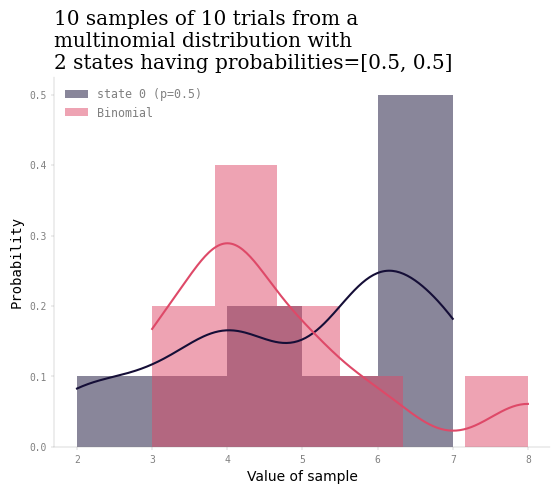

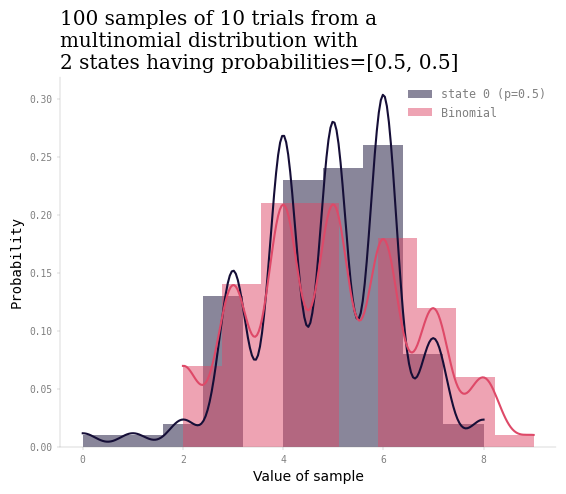

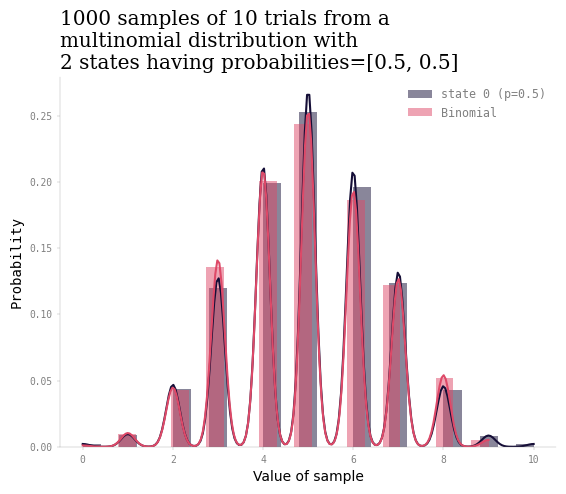

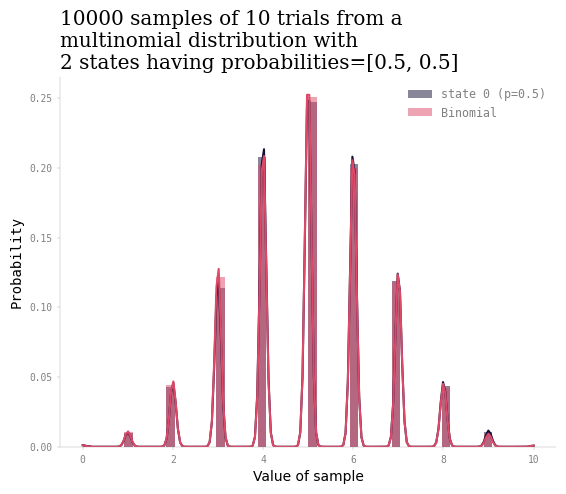

In [41]:
import numpy as np
import seaborn as sns # type: ignore
from configurations import logger
import matplotlib.pyplot as plt
from typing import Any

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def choose_my_color(integer: int = 0) -> str:
    return (plt.rcParams['axes.prop_cycle'] # type: ignore
            .by_key()["color"][integer]
            )

def plot_multinomial(
    pvals: Any,
    n_trials: int = 1,
    size: int = 10,
    bw_adjust: float = 1
    ) -> None:

    n_states = len(pvals)
    partial_sum_pvals = sum(pvals[:-1])
    final_pval = 1 - partial_sum_pvals
    pvals[~0] = final_pval

    ax = plt.subplots()[1] # type: ignore
    
    sample_results = [
        np.random.multinomial(pvals=pvals, n=n_trials) for _ in [*range(size)]
        ]
        
    rotated_sample_results = np.flipud(np.rot90(  # type: ignore
        sample_results
        ))

    for state in [*range(n_states)]:

        if state == 0:
            pval=pvals[state]
            state_results=rotated_sample_results[state]
            sns.histplot( # type: ignore
                state_results,
                ax=ax,
                stat='probability',
                kde=True,
                kde_kws={'bw_adjust' : bw_adjust},
                edgecolor='None',
                label=f'state {state} (p={pval})',
                color=choose_my_color(0)
            )

            my_binomial = np.random.binomial(n=n_trials, p=pval, size=size)

            sns.histplot( # type: ignore
                my_binomial,
                ax=ax,
                stat='probability',
                kde=True,
                kde_kws={'bw_adjust' : bw_adjust},
                edgecolor='None',
                label='Binomial',
                color=choose_my_color(5)
                )

            ax.legend() # type: ignore
            
            plt.title( # type: ignore
                label=f'{size} samples of {n_trials:,.0f} trials from a\n' 'multinomial distribution with\n'
                f'{n_states:,} states having probabilities={pvals}',
                family='serif'
                    )
            
            plt.xlabel( # type: ignore
                xlabel='Value of sample', family='sans-serif'
                )
    
sizes_bandwidths_to_cycle_through = {
    10 : 0.575,
    100 : 0.475,
    1_000 : 0.375,
    10_000 : 0.275
    }

for size in sizes_bandwidths_to_cycle_through:
    plot_multinomial(pvals=[0.5, 0.5], n_trials=10, size=size, bw_adjust=sizes_bandwidths_to_cycle_through[size])

One can visualize the results of multiple states in the same visualization, but the visual will quickly become crowded and difficult to interpret.

It will only be useful to do this if the p-values differ significantly between the states.


2023-08-22 16:05:19 
	Logger: numpy-tutorial Module: 2725417901 Function: <module> File: 2725417901.py Line: 9
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-22 16:05:19 
	Logger: numpy-tutorial Module: 2725417901 Function: <module> File: 2725417901.py Line: 14
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



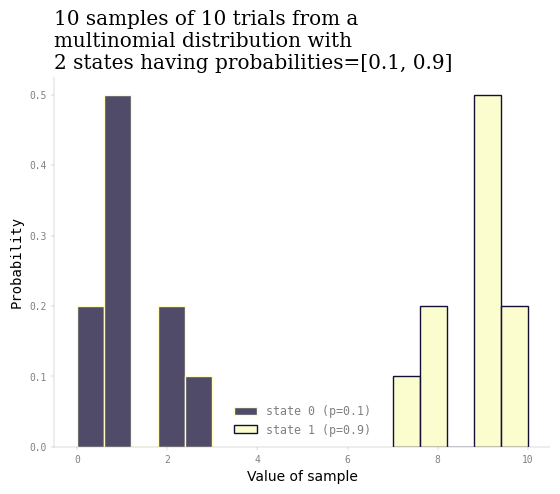

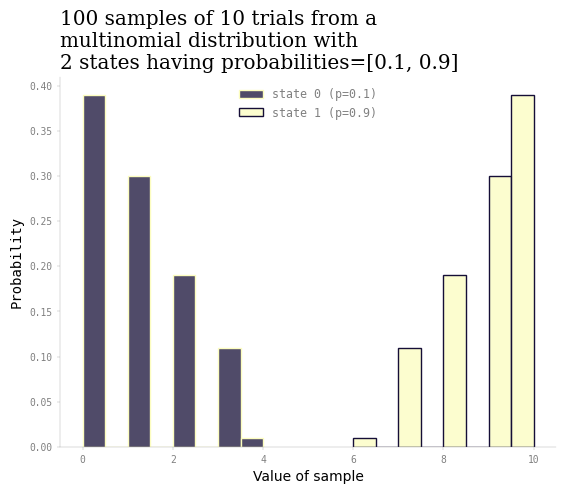

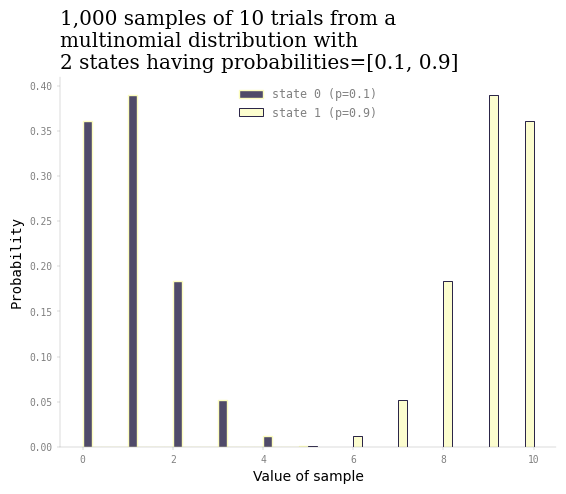

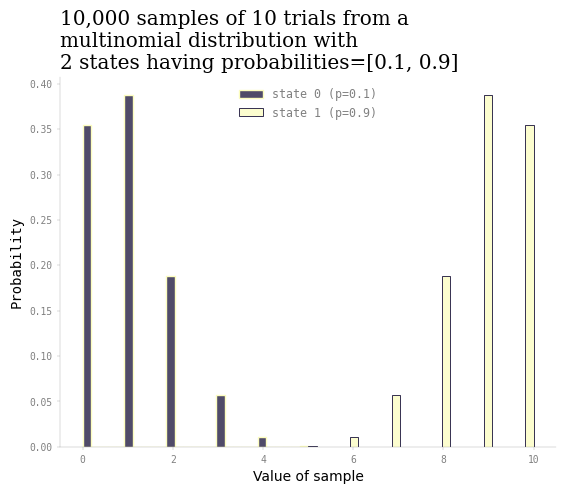

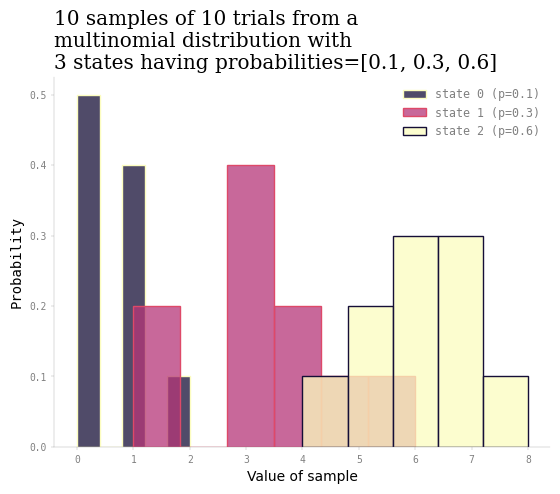

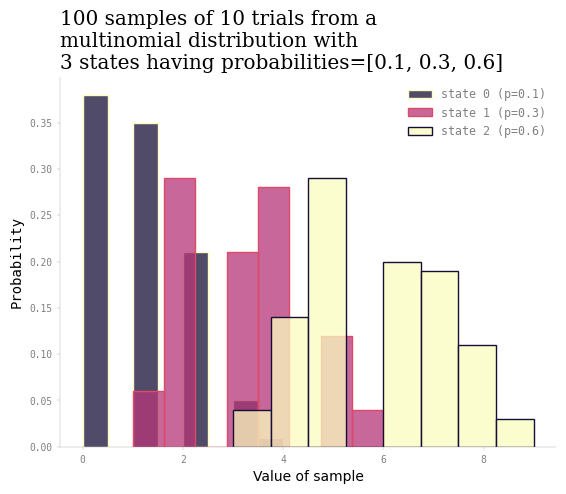

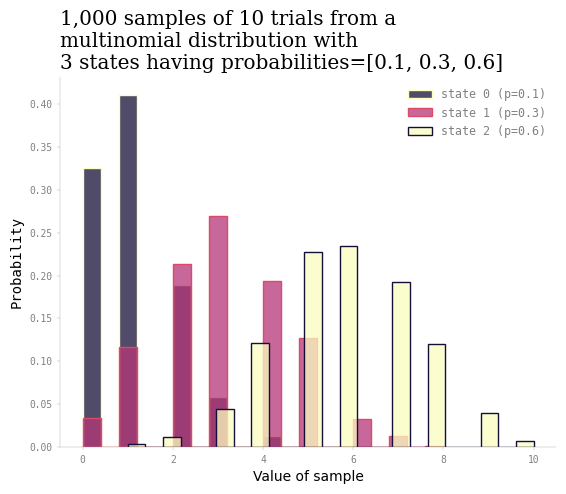

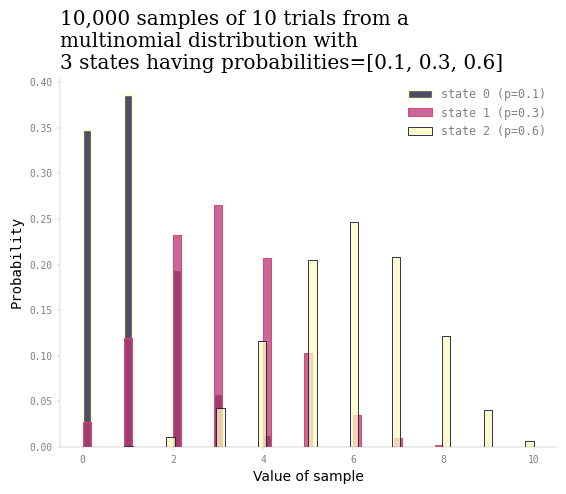

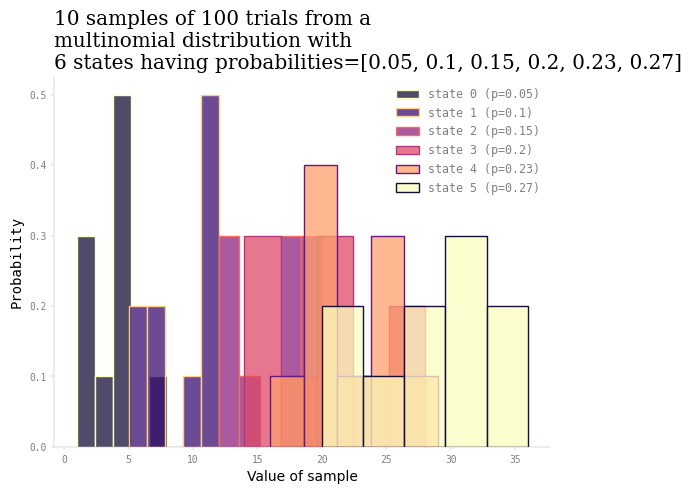

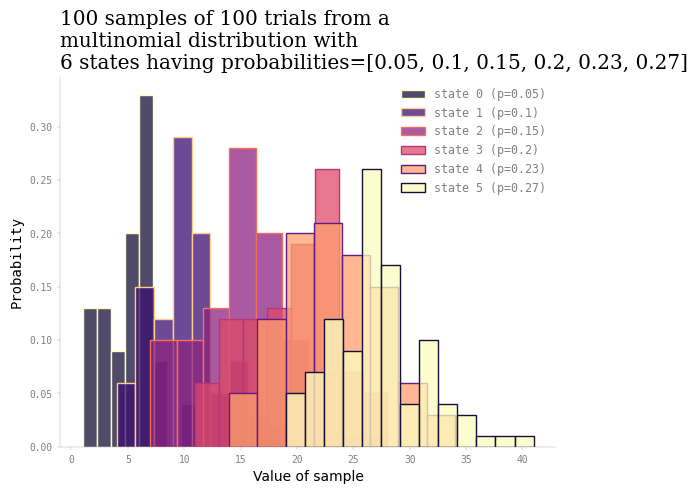

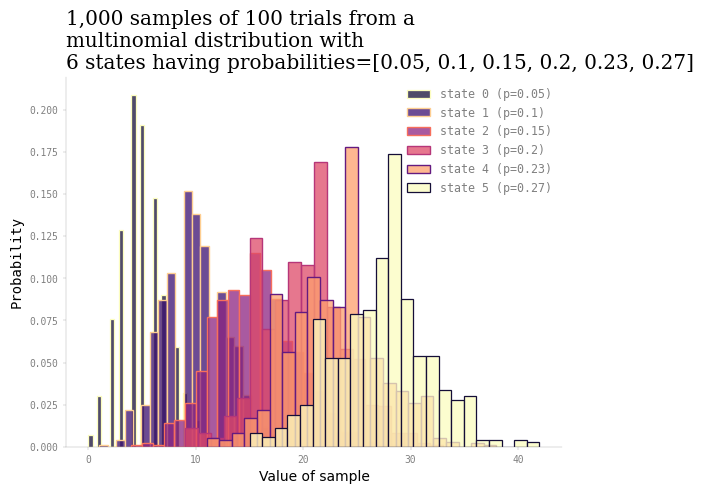

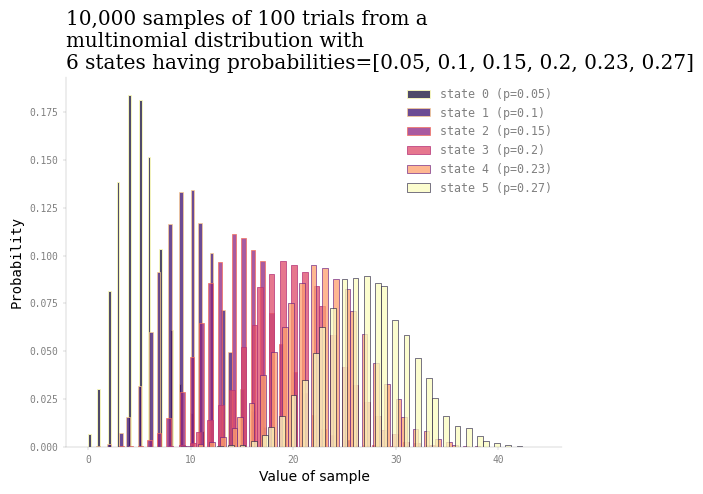

In [29]:
import numpy as np
import seaborn as sns # type: ignore
from configurations import logger
import matplotlib.pyplot as plt
from typing import Any

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

my_colors = plt.rcParams['axes.prop_cycle'].by_key()["color"] # type: ignore
n_colors = len(my_colors) # type: ignore

def choose_my_color(integer: int = 0) -> str:
    return (my_colors[integer]) # type: ignore

def plot_multinomial(
    pvals: Any,
    n_trials: int = 1,
    size: int = 10
    ) -> None:

    n_states = len(pvals)
    colors_to_use = np.linspace(0, n_colors-1, n_states)
    partial_sum_pvals = sum(pvals[:-1])
    final_pval = np.round(1 - partial_sum_pvals, 2)
    pvals[~0] = final_pval

    ax = plt.subplots()[1] # type: ignore
    
    sample_results = [
        np.random.multinomial(pvals=pvals, n=n_trials) for _ in [*range(size)]
        ]
        
    rotated_sample_results = np.flipud(np.rot90(  # type: ignore
        sample_results
        ))

    for state in [*range(n_states)]:

        pval = pvals[state]
        state_results = rotated_sample_results[state]

        sns.histplot( # type: ignore
            state_results,
            ax=ax,
            stat='probability',
            color=choose_my_color(int(colors_to_use[state])),
            edgecolor=choose_my_color(~int(colors_to_use[state])),
            label=f'state {state} (p={pval})'
        )

        ax.legend() # type: ignore
        
        plt.title( # type: ignore
            label=f'{size:,} samples of {n_trials:,.0f} trials from a\n' 'multinomial distribution with\n'
            f'{n_states:,} states having probabilities={pvals}',
            family='serif'
                )
        
        plt.xlabel( # type: ignore
            xlabel='Value of sample', family='sans-serif'
            )
    
sizes_bandwidths_to_cycle_through = {
    10 : 0.575,
    100 : 0.475,
    1_000 : 0.375,
    10_000 : 0.275
    }

for size in sizes_bandwidths_to_cycle_through:
    plot_multinomial(pvals=[0.1, 0.9], n_trials=10, size=size)

for size in sizes_bandwidths_to_cycle_through:
    plot_multinomial(pvals=[0.1, 0.3, 0.6], n_trials=10, size=size)

for size in sizes_bandwidths_to_cycle_through:
    plot_multinomial(pvals=[0.05, 0.10, 0.15, 0.20, 0.23, 0.27], n_trials=100, size=size)